In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.cluster as sk

plt.close('all')
xx = pd.read_csv("covid_serological_results.csv")
xx=xx[xx.COVID_swab_res!=1]
xx.COVID_swab_res[xx.COVID_swab_res==2]=1
swab=xx.COVID_swab_res.values
Test1=xx.IgG_Test1_titre.values
Test2=xx.IgG_Test2_titre.values

/var/folders/r5/tmz4tmxn6s5f_cnt2d3y0pv00000gn/T/ipykernel_13213/4259528967.py:9: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  xx.COVID_swab_res[xx.COVID_swab_res==2]=1


In [17]:
xx.shape

(862, 3)

In [8]:
xx.columns

Index(['COVID_swab_res', 'IgG_Test1_titre', 'IgG_Test2_titre'], dtype='object')

In [10]:
xx.describe()

,COVID_swab_res,IgG_Test1_titre,IgG_Test2_titre
count,862.000000,862.000000,862.000000
mean,0.082367,9.374849,0.803515
std,0.275082,20.431089,2.064172
min,0.000000,2.500000,0.000000
25%,0.000000,2.500000,0.020000
50%,0.000000,2.500000,0.030000
75%,0.000000,5.175000,0.070000
max,1.000000,314.000000,9.690000


array([[<Axes: xlabel='COVID_swab_res', ylabel='COVID_swab_res'>,
        <Axes: xlabel='IgG_Test1_titre', ylabel='COVID_swab_res'>,
        <Axes: xlabel='IgG_Test2_titre', ylabel='COVID_swab_res'>],
       [<Axes: xlabel='COVID_swab_res', ylabel='IgG_Test1_titre'>,
        <Axes: xlabel='IgG_Test1_titre', ylabel='IgG_Test1_titre'>,
        <Axes: xlabel='IgG_Test2_titre', ylabel='IgG_Test1_titre'>],
       [<Axes: xlabel='COVID_swab_res', ylabel='IgG_Test2_titre'>,
        <Axes: xlabel='IgG_Test1_titre', ylabel='IgG_Test2_titre'>,
        <Axes: xlabel='IgG_Test2_titre', ylabel='IgG_Test2_titre'>]],
      dtype=object)

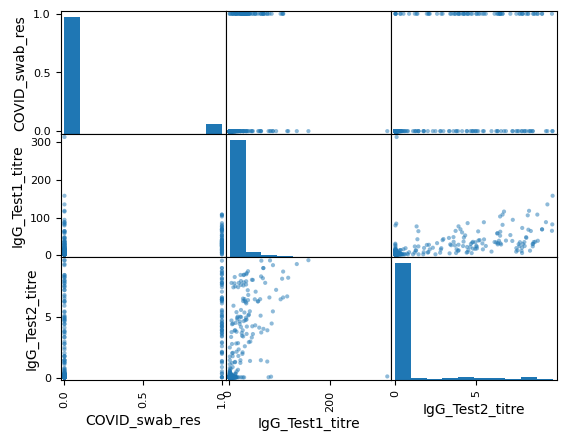

In [ ]:
pd.plotting.scatter_matrix(xx) #shows the scatter matrix of the data which is useful to see the correlation between the variables

In [ ]:
x=Test2
y=swab
x0=x[swab==0]
x1=x[swab==1]
Np=np.sum(swab==1)
Nn=np.sum(swab==0)
thresh = 5
n1=np.sum(x1>thresh)
sens =n1/Np # sensitivity is True positive rate = TP/P P(Tp|Disease)
n0=np.sum(x0<thresh)
spec=n0/Nn # specificity is True negative rate = TN/N P(Tn|No Disease)
print("Sensitivity = ",sens)
print("Specificity = ",spec)

Sensitivity =  0.4788732394366197
Specificity =  0.9620733249051833


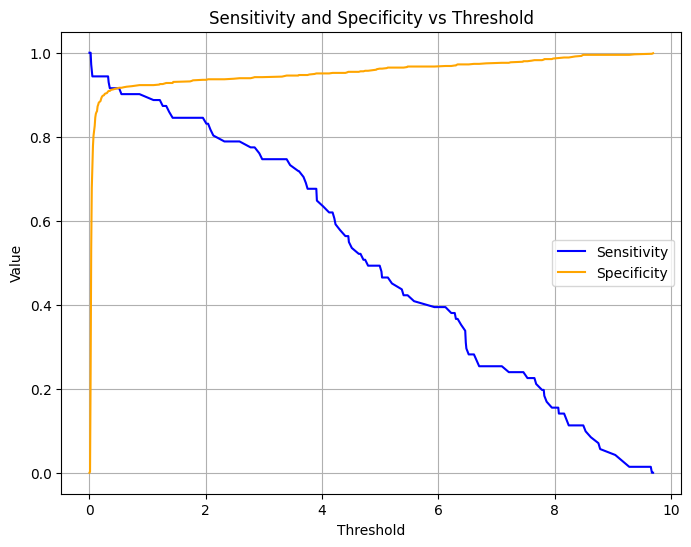

In [ ]:
def calculate_sensitivity_specificity(thresholds, x, swab):
    """
    Calculate sensitivity and specificity for given thresholds.
    Args:
        thresholds: Array of threshold values.
        x: Test scores (e.g., Test2 values).
        swab: True labels (1 for positive, 0 for negative).

    Returns:
        sensitivity: List of sensitivity values.
        specificity: List of specificity values.
    """
    sensitivity = []
    specificity = []

    for thresh in thresholds:
        # True Positive: swab = 1 and x > thresh
        tp = np.sum((swab == 1) & (x >= thresh))
        # True Negative: swab = 0 and x <= thresh
        tn = np.sum((swab == 0) & (x < thresh)) # change to x > thresh for specificity ?

        # Sensitivity (True Positive Rate)
        sens = tp / np.sum(swab == 1)  # Total Positives
        # Specificity (True Negative Rate)
        spec = tn / np.sum(swab == 0)  # Total Negatives

        sensitivity.append(sens)
        specificity.append(spec)

    return sensitivity, specificity


sorted_test2 = np.sort(Test2)

# Define thresholds from sorted Test2 values 
thresholds = np.unique(np.concatenate(([0], np.sort(Test2))))

# Calculate sensitivity and specificity
sensitivity_values, specificity_values = calculate_sensitivity_specificity(thresholds, Test2, swab)

# Plot sensitivity and specificity
plt.figure(figsize=(8, 6))
plt.plot(thresholds, sensitivity_values, label='Sensitivity', color='blue') # sensitivity is TP/P P(Tp|Disease)
plt.plot(thresholds, specificity_values, label='Specificity', color='orange') # specificity is TN/N P(Tn|No Disease)
plt.xlabel('Threshold')
plt.ylabel('Value')
plt.title('Sensitivity and Specificity vs Threshold')
plt.legend()
plt.grid(True)
plt.show()

###### Sensitivity=  True Positives (TP) / Total Positives (P)
###### Specificity=  True Negatives (TN) / Total Negatives (N)


In [ ]:
FA=1-spec # False Alarm rate = 1 - specificity # P(Tp|No Disease)

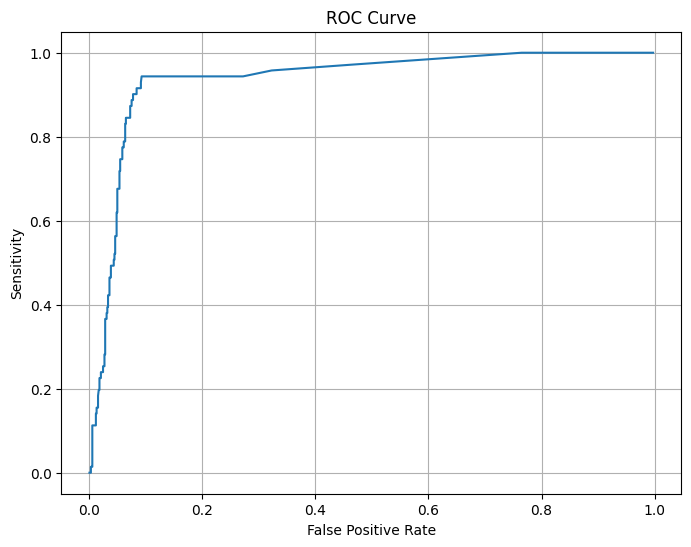

In [27]:
def calculate_sensitivity_specificity(thresholds, x, swab):
    sensitivity = []
    specificity = []

    for thresh in thresholds:
        n1 = np.sum((swab == 1) & (x > thresh))
        n0 = np.sum((swab == 0) & (x > thresh))  # False positive rate calculation

        sens = n1 / np.sum(swab == 1)
        spec = n0 / np.sum(swab == 0)

        sensitivity.append(sens)
        specificity.append(1 - spec)  # False positive rate is (1 - specificity)

    return sensitivity, specificity

sorted_test2 = np.sort(Test2)

thresholds = np.unique(np.concatenate(([0], sorted_test2)))

sensitivity_values, specificity_values = calculate_sensitivity_specificity(thresholds, Test2, swab)

plt.figure(figsize=(8, 6))
plt.plot(1 - np.array(specificity_values), sensitivity_values)
plt.xlabel('False Positive Rate')
plt.ylabel('Sensitivity')
plt.title('ROC Curve')
plt.grid(True)
plt.show()

In [ ]:
def calculate_auc(x, y):
    x = np.array(x)
    y = np.array(y)

    sorted_indices = np.argsort(x)
    x_sorted = x[sorted_indices]
    y_sorted = y[sorted_indices]

    auc = np.trapz(y_sorted, x_sorted) # Calculate area under the curve using trapezoidal rule (integral)

    return auc

auc_value = calculate_auc(1 - np.array(specificity_values), sensitivity_values) # AUC is calculated using False Positive Rate and Sensitivity
print(f"Area Under the Curve (AUC): {auc_value}")


Area Under the Curve (AUC): 0.9363081141717562


In [ ]:
from sklearn.metrics import roc_auc_score

auc_value_trapezoidal = calculate_auc(1 - np.array(specificity_values), sensitivity_values)

auc_value_sklearn = roc_auc_score(swab, Test2)

print(f"AUC using trapezoidal rule: {auc_value_trapezoidal}") # AUC calculated using trapezoidal rule shows the how well the model is performing in terms of True Positive Rate and False Positive Rate
print(f"AUC using sklearn's roc_auc_score: {auc_value_sklearn}")


AUC using trapezoidal rule: 0.9363081141717562
AUC using sklearn's roc_auc_score: 0.9362546963195099


# Test 1

In [33]:
x=Test1
y=swab
x0=x[swab==0]
x1=x[swab==1]
Np=np.sum(swab==1)
Nn=np.sum(swab==0)
thresh = 5
n1=np.sum(x1>thresh)
sens =n1/Np
n0=np.sum(x0<thresh)
spec=n0/Nn
print("Sensitivity = ",sens)
print("Specificity = ",spec)

Sensitivity =  0.9577464788732394
Specificity =  0.7951959544879899


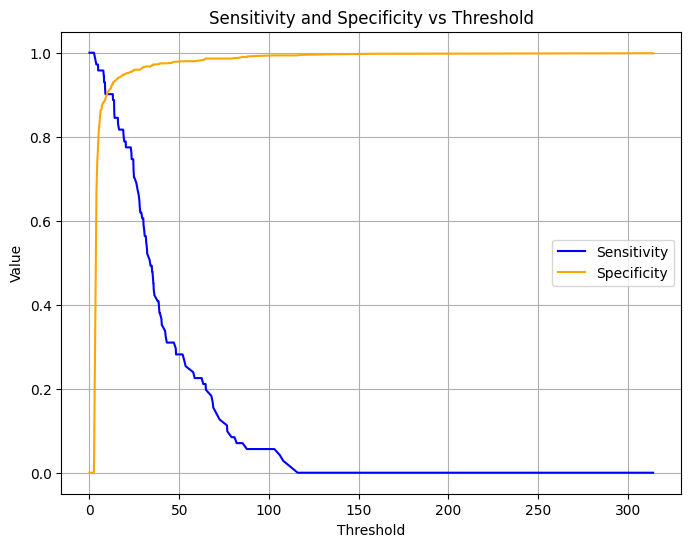

In [34]:
# Define thresholds from sorted Test1
thresholds = np.unique(np.concatenate(([0], np.sort(Test1))))

# Calculate sensitivity and specificity
sensitivity_values, specificity_values = calculate_sensitivity_specificity(thresholds, Test1, swab)

# Plot sensitivity and specificity
plt.figure(figsize=(8, 6))
plt.plot(thresholds, sensitivity_values, label='Sensitivity', color='blue')
plt.plot(thresholds, specificity_values, label='Specificity', color='orange')
plt.xlabel('Threshold')
plt.ylabel('Value')
plt.title('Sensitivity and Specificity vs Threshold')
plt.legend()
plt.grid(True)
plt.show()

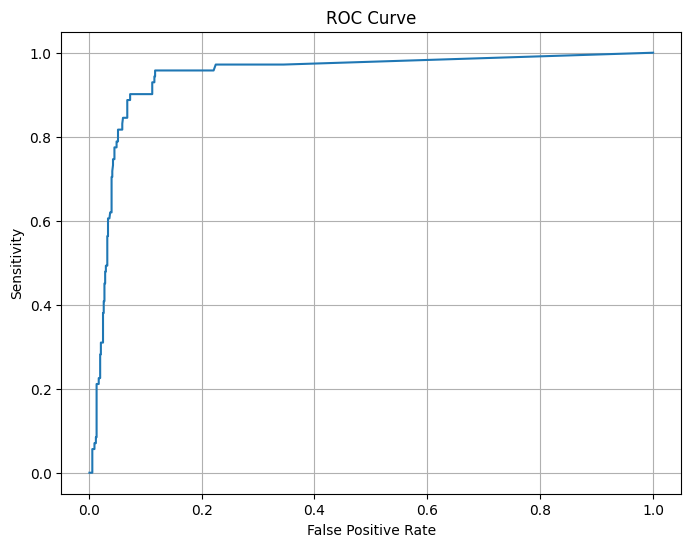

In [35]:
FA=1-spec

sorted_test1 = np.sort(Test1)
thresholds = np.unique(np.concatenate(([0], sorted_test1)))

sensitivity_values, specificity_values = calculate_sensitivity_specificity(thresholds, Test1, swab)

plt.figure(figsize=(8, 6))
plt.plot(1 - np.array(specificity_values), sensitivity_values)
plt.xlabel('False Positive Rate')
plt.ylabel('Sensitivity')
plt.title('ROC Curve')
plt.grid(True)
plt.show()

In [ ]:
auc_value = calculate_auc(1 - np.array(specificity_values), sensitivity_values) # this shows the area under the curve for the model - the curve is the ROC curve - you want this to be as close to 1 as possible
print(f"Area Under the Curve (AUC): {auc_value}") # the values comes from the trapezoidal rule 

Area Under the Curve (AUC): 0.9435284272003703


In [37]:
from sklearn.metrics import roc_auc_score

auc_value_trapezoidal = calculate_auc(1 - np.array(specificity_values), sensitivity_values)

auc_value_sklearn = roc_auc_score(swab, Test2)

print(f"AUC using trapezoidal rule: {auc_value_trapezoidal}")
print(f"AUC using sklearn's roc_auc_score: {auc_value_sklearn}")


AUC using trapezoidal rule: 0.9435284272003703
AUC using sklearn's roc_auc_score: 0.9362546963195099
